# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Import the necessary libraries

In [169]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [170]:
#reading the vechile data
vechiledata = pd.read_csv(r'D:\SAI\MECH\Great Learning\Study\UNSupervisedLearning\Project\vehicledata.csv')
vechiledata.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [171]:
#Understanding shape of data
vechiledata.shape

(846, 19)

The data shows it has 846 rows & 19 columns

In [172]:
#get detail information
vechiledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

All the attributes are of int,float except class is of category

In [173]:
#class attribute is not an object it is a category
vechiledata['class']=vechiledata['class'].astype('category')

In [174]:
#get the summary of data
vechiledata.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [175]:
#Checking for missing values in the dataset
vechiledata.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Some attributes are having missing values replacing in median

In [176]:
#replace missing variable('?') into null variable using numpy
vechiledata = vechiledata.replace(' ', np.nan)

In [177]:
#Replacing the missing values by median 
for i in vechiledata.columns[:17]:
    median_value = vechiledata[i].median()
    vechiledata[i] = vechiledata[i].fillna(median_value)

In [178]:
# Again checking for missing values in the dataset
vechiledata.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

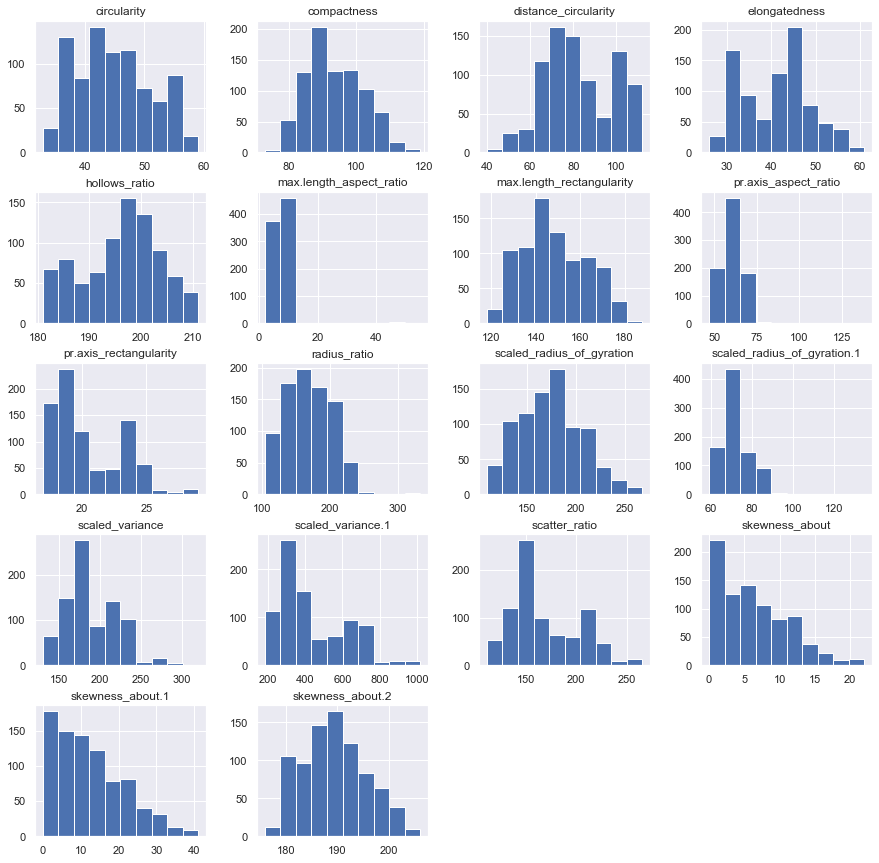

In [179]:
#graphical representation Histplot
vechiledata.hist(figsize=(15,15));

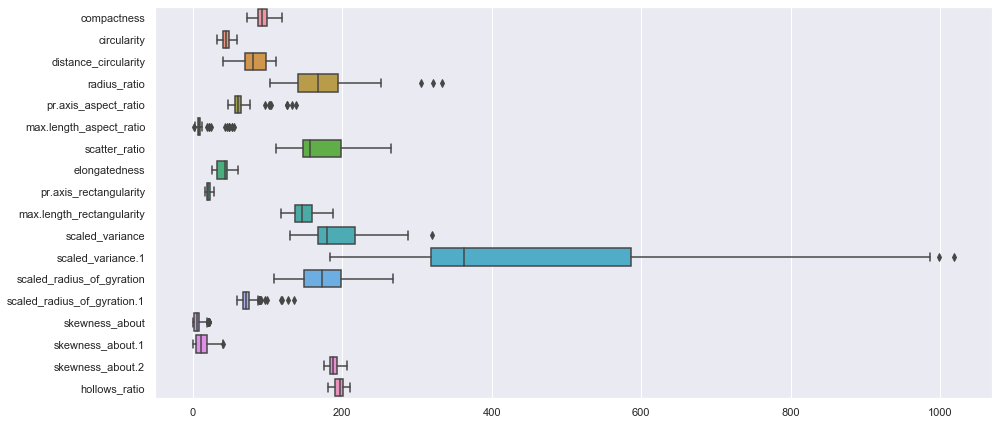

In [180]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = vechiledata.iloc[:, 0:18], orient = 'h')

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Get the target column distribution

In [181]:
vechiledata['class'].unique()

[van, car, bus]
Categories (3, object): [van, car, bus]

In [182]:
vechiledata['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

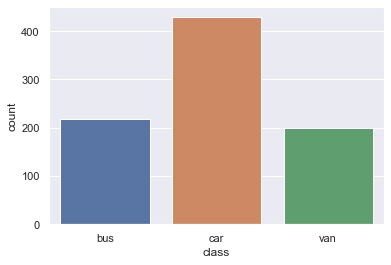

In [183]:
sns.countplot(vechiledata['class']);

In [184]:
groupby=vechiledata.groupby('class')
groupby.mean()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus      91.591743    44.963303             76.811927    165.720183   
car      96.184149    46.030303             88.878788    180.496503   
van      90.562814    42.070352             73.281407    147.276382   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus               63.403670                 7.013761     170.022936   
car               60.993007                 8.825175     180.997669   
van               61.261307                 9.713568     141.537688   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus        40.114679               20.577982                 146.701835   
car        38.104895               21.508159                 149.967366   
van        47.939698               18.582915                 145.175879   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus         192.889908         448.894495                 180.963303   
car         197.806527         499.904429                 179.613054   
van         164.040201         298.201005                 157.276382   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                      77.071101        4.816514         10.211009   
car                      69.935897        7.121212         15.160839   
van                      72.778894        6.417085          9.698492   

       skewness_about.2  hollows_ratio  
class                                   
bus          187.811927     191.325688  
car          189.470862     197.582751  
van          188.939698     196.145729

In [185]:
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder

#Encoding of categorical variables
labelencoder_X=LabelEncoder()
vechiledata['class']=labelencoder_X.fit_transform(vechiledata['class'])

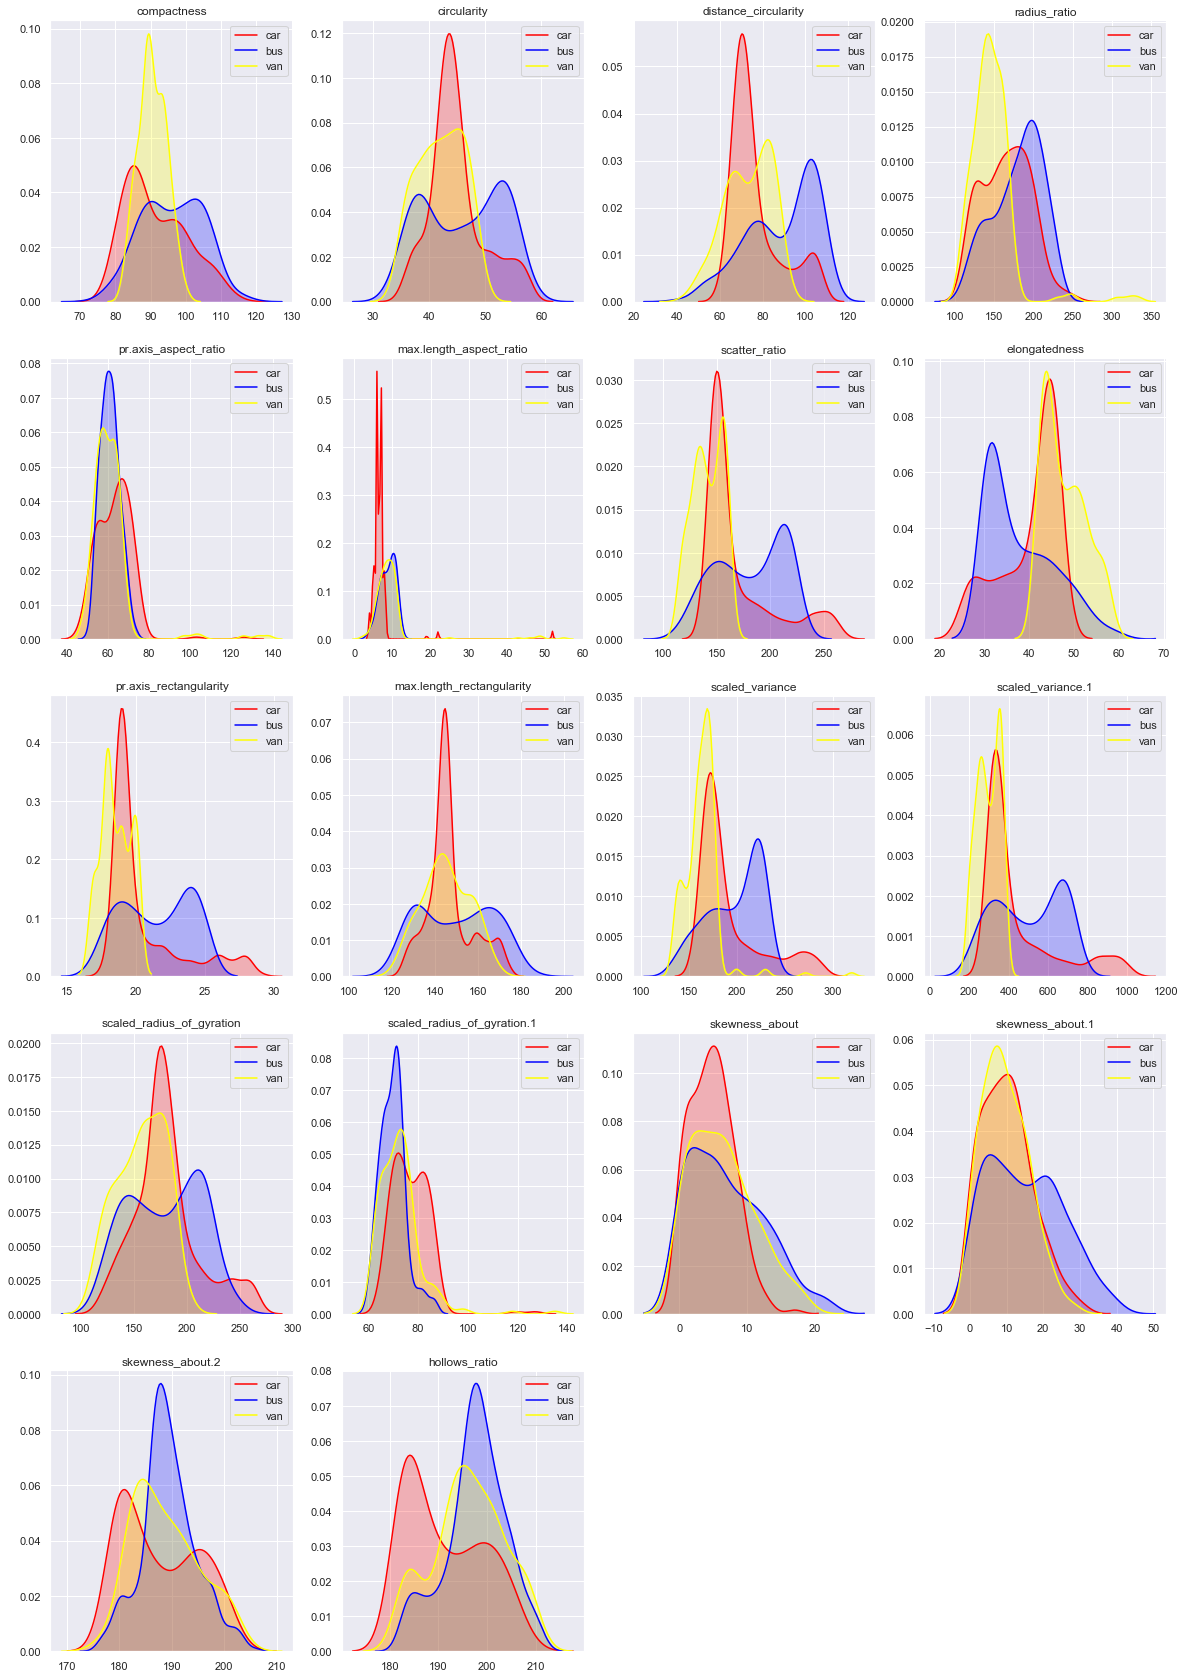

In [187]:
# kde plots to show the distribution of the all the variables with respect to dependent variable
k=1
plt.figure(figsize=(20,30))
for col in vechiledata.columns[0:18]:
    plt.subplot(5,4,k)
    sns.kdeplot(vechiledata[vechiledata['class']==0][col],color='red',label='car',shade=True)
    sns.kdeplot(vechiledata[vechiledata['class']==1][col],color='blue',label='bus',shade=True)
    sns.kdeplot(vechiledata[vechiledata['class']==2][col],color='yellow',label='van',shade=True)
    plt.title(col)
    k=k+1

In [188]:
#correlation matrix
cor=vechiledata.corr()
cor

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   
class                           -0.182186             -0.098178   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                            

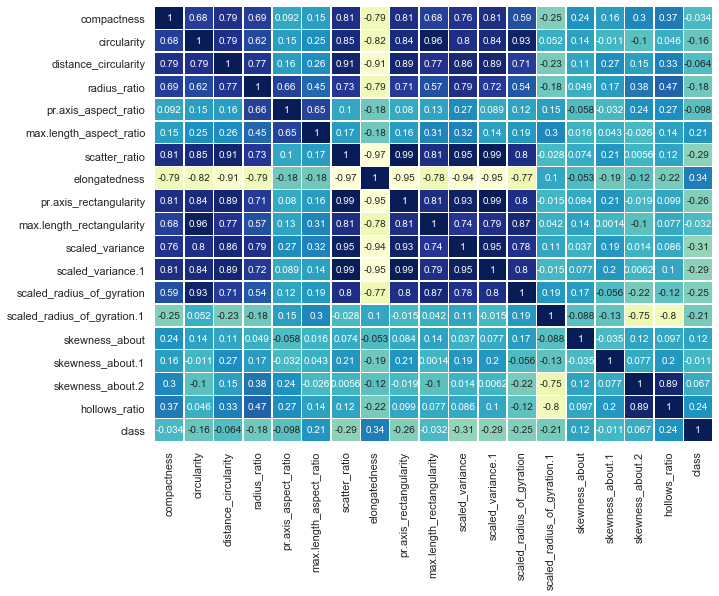

In [189]:
#graphical representation of heatmap
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True,linewidths=.5,center=0,cbar=False,cmap="YlGnBu");

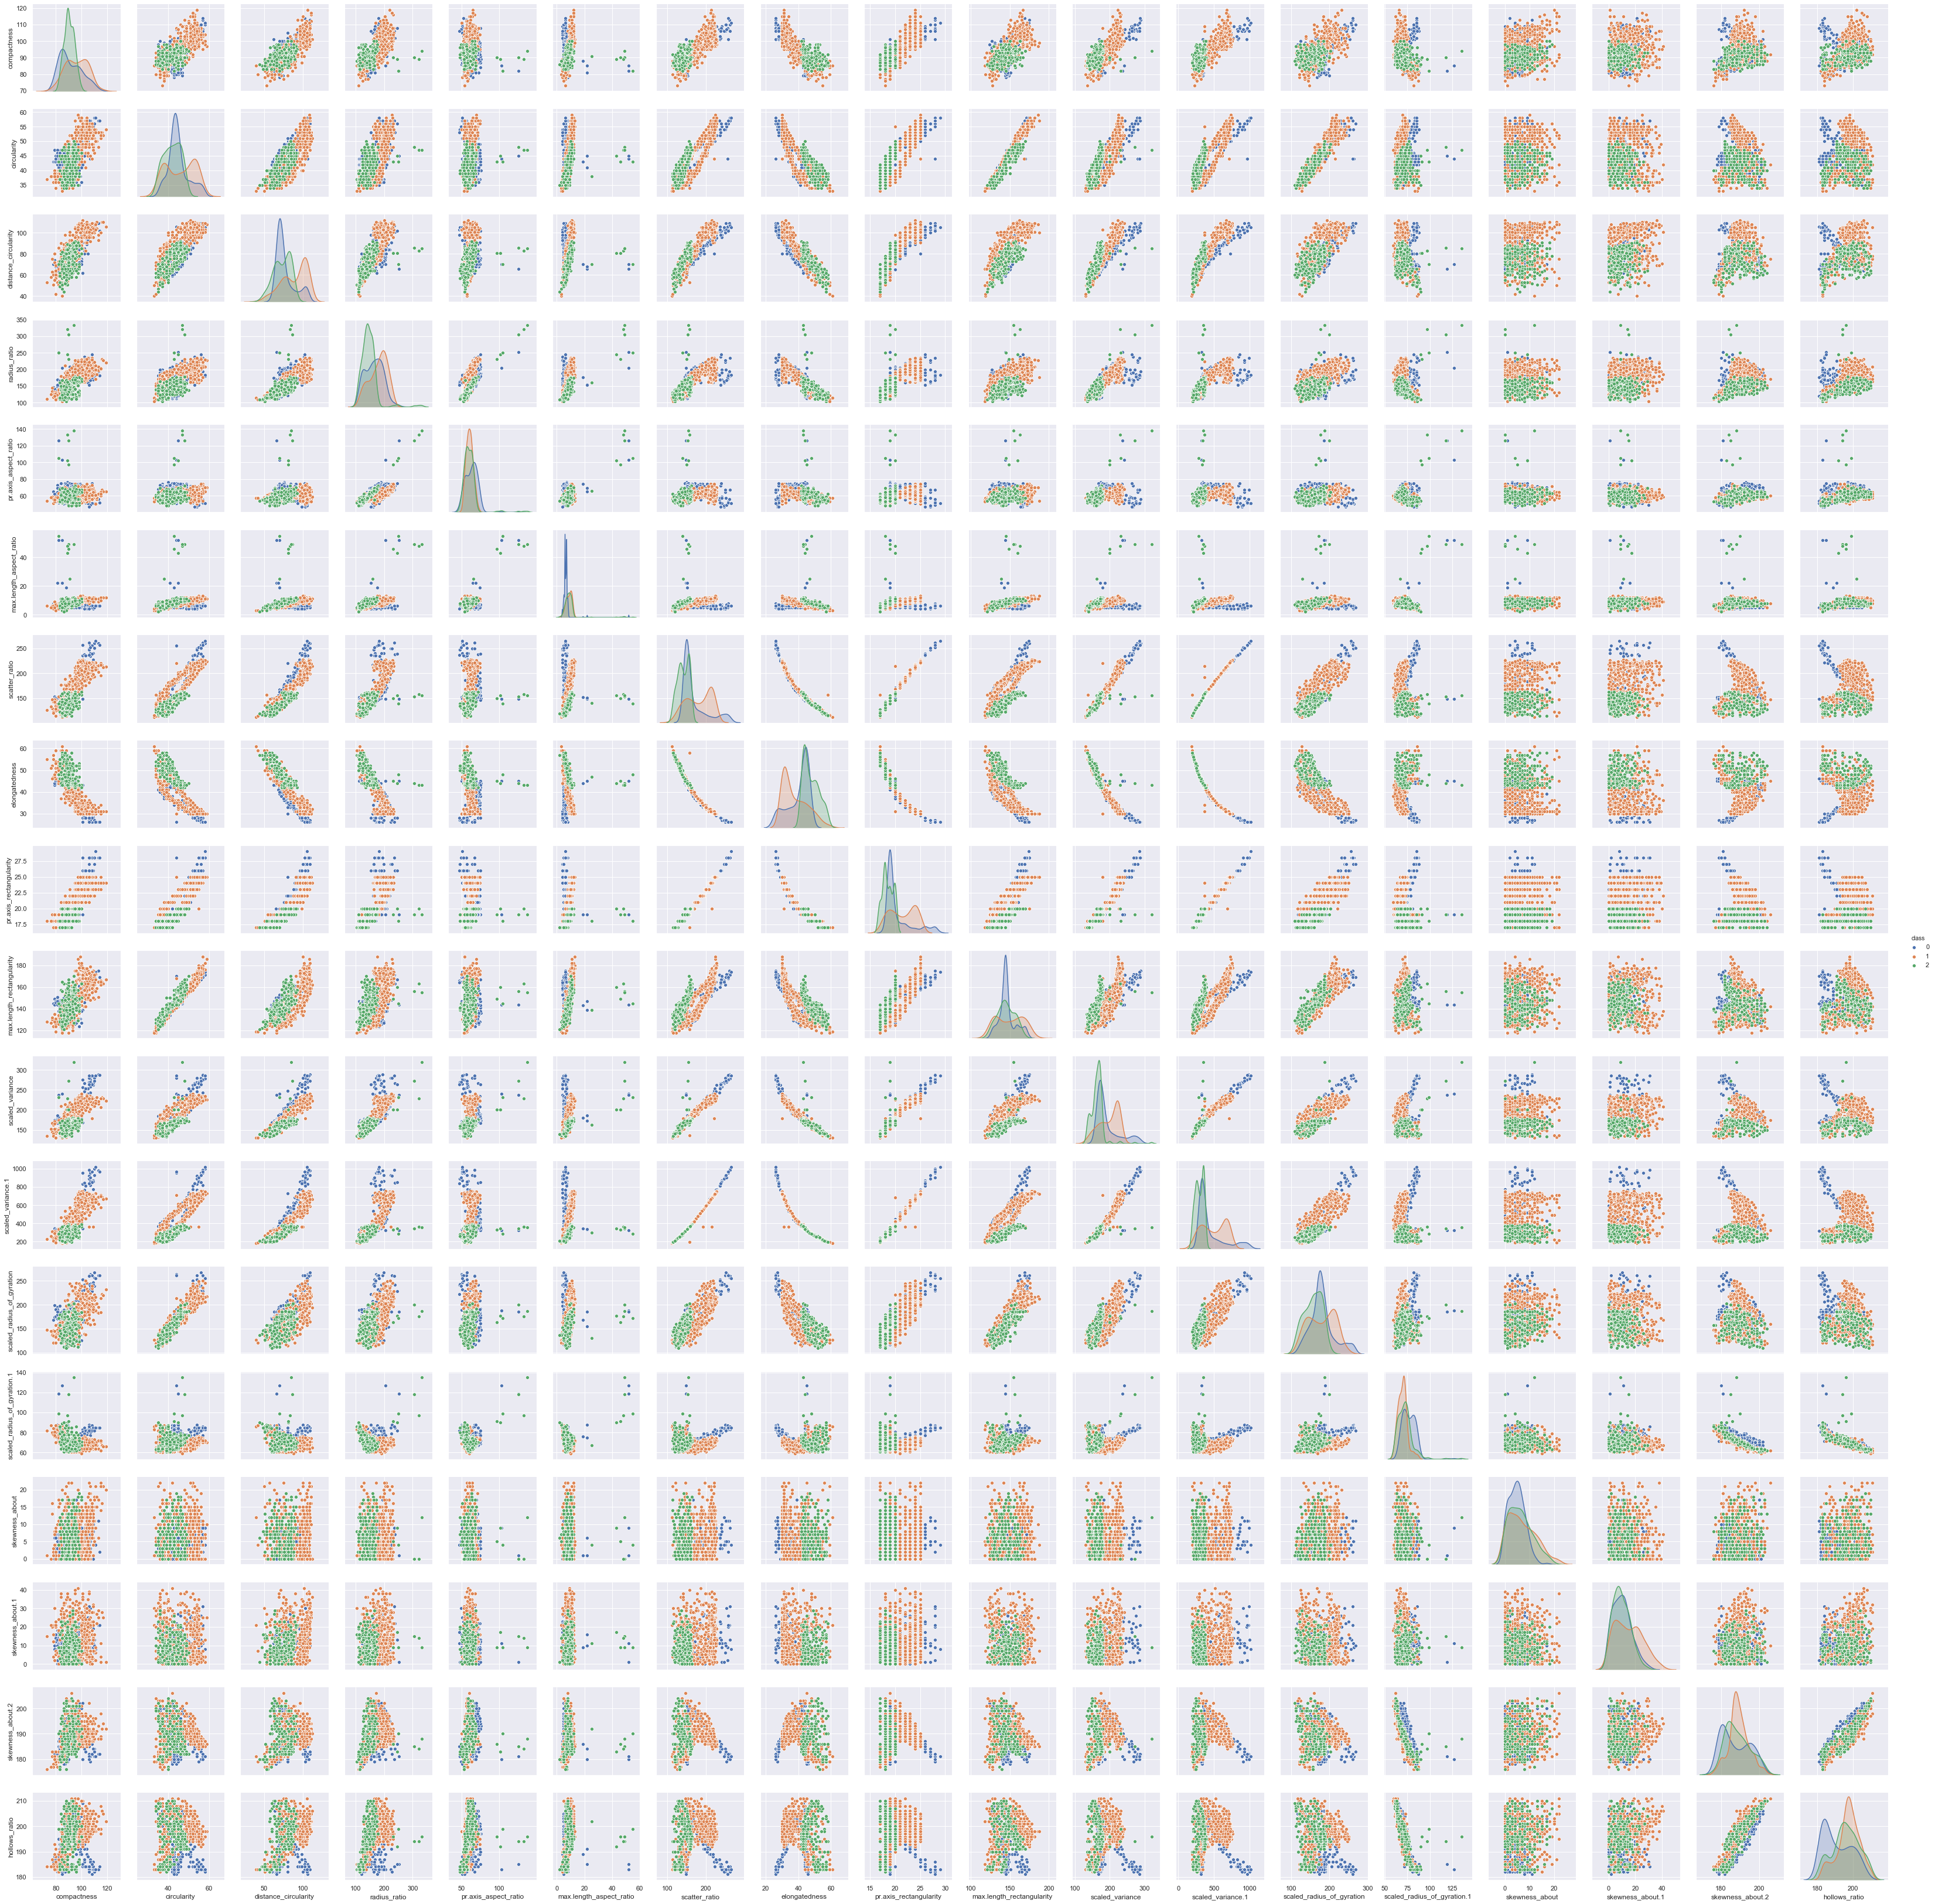

In [190]:
#Pair plot that includes all the columns of the data frame
sns.pairplot(vechiledata,hue='class');

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [191]:
## Creating a copy of dataframe for manipulation
vechiledata_split = vechiledata
vechiledata_split.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

In [192]:
##Importing training and test set split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [193]:
## Define X and y variables
X = vechiledata_split.drop('class',axis=1)
y = vechiledata_split['class']

In [194]:
#importing the zscore for scaling
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [195]:
#splitting the data to 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=10)

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4.Train a Support vector machine using the train set and get the accuracy on the test set

In [196]:
# Import the metrics
from sklearn import metrics
# Import Support Vector Classifier machine learning library
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [197]:
# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(X_train, y_train)

ypred_SVM = svc_model.predict(X_test)


In [198]:
# check the accuracy on the training set
print('Accuracy of  SVM model on train set: {:.2f}'.format(svc_model.score(X_train, y_train)))
print('Accuracy of  SVM model on train set: {:.2f}'.format(svc_model.score(X_test, y_test)))

Accuracy of  SVM model on train set: 0.97
Accuracy of  SVM model on train set: 0.96


In [199]:
print(classification_report(y_test, ypred_SVM))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.98      0.96      0.97       125
           2       0.89      0.97      0.93        58

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254



# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5. Perform K-fold cross validation and get the cross validation score of the model

In [200]:
# Importing libraries KFold,cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [201]:
num_folds = 10
seed = 10

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True);
model = SVC()
results = cross_val_score(model, XScaled, y, cv=kfold);
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.95294118 0.94117647 0.97647059 0.94117647 0.94117647 0.95294118
 0.96428571 0.98809524 0.98809524 0.96428571]
Accuracy: 96.106% (1.743%)


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [202]:
#Importing PCA for dimensionality reduction and visualization
from sklearn.decomposition import PCA


In [203]:
#covarience matrix of scaled data
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [204]:
#Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

In [205]:
# Make a set of (eigenvalue, eigenvector) pairs
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:]

[(9.404602609088705,
  array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
          0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
          0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
          0.05822502,  0.03027951,  0.07414539])),
 (3.014922058524633,
  array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
         -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
         -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
          0.12408509,  0.54091477,  0.54035426])),
 (1.9035250218389657,
  array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
         -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
         -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
          0.07528289, -0.00873592, -0.03952427])),
 (1.1799374684450215,
  array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
         -0.03141473,

In [206]:
# print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigenvalues)

Eigenvalues in descending order: 
[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.96445743e-03 1.00257898e-02 2.74120657e-02
 1.79166314e-02 2.05792871e-02]


Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


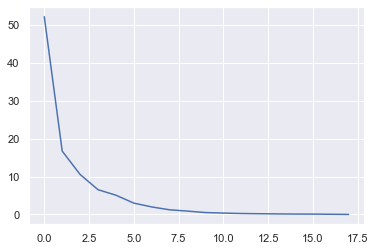

In [207]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp)

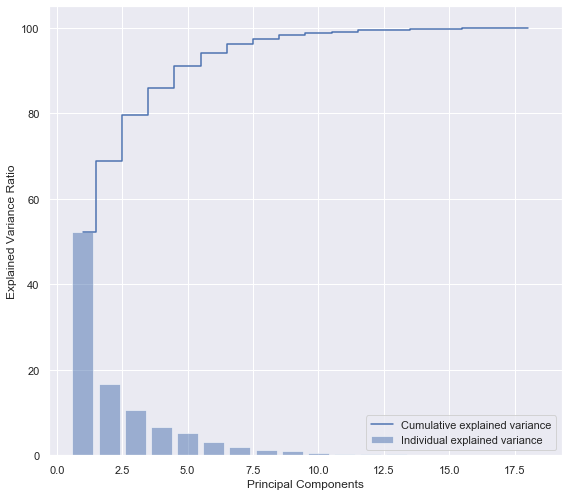

In [208]:
# Ploting 
plt.figure(figsize=(8 , 7))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier

In [209]:
#lets fit pca with 5 attributes
pca3 = PCA(n_components=7)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [210]:
Xpca3  #pca applied data

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
         7.93007079e-02, -7.57446693e-01, -9.01124283e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
         6.93948582e-01, -5.17161832e-01,  3.78636988e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
         7.31732265e-01,  7.05041037e-01, -3.45837595e-02],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
        -1.34423635e+00, -2.17069763e-01,  5.73248962e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
         4.27680052e-02, -4.02491279e-01, -2.02405787e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
        -5.40510367e-02, -3.35637136e-01,  5.80978683e-02]])

In [211]:
X_train, X_test, Y_train, Y_test = train_test_split(Xpca3, y, test_size=0.30, random_state=10)

In [212]:
# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(X_train, y_train)

ypca_SVM = svc_model.predict(X_test)


In [213]:
# check the accuracy on the training set
print('Accuracy of  SVM model on train set: {:.2f}'.format(svc_model.score(X_train, y_train)))
print('Accuracy of  SVM model on train set: {:.2f}'.format(svc_model.score(X_test, y_test)))

Accuracy of  SVM model on train set: 0.94
Accuracy of  SVM model on train set: 0.90


In [214]:
print(classification_report(y_test, ypca_SVM))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        71
           1       0.91      0.91      0.91       125
           2       0.79      0.91      0.85        58

    accuracy                           0.90       254
   macro avg       0.90      0.89      0.89       254
weighted avg       0.90      0.90      0.90       254



In [215]:
num_folds = 10
seed = 10

kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True);
model_pca = SVC()
results = cross_val_score(model_pca,Xpca3, y, cv=kfold);
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.88235294 0.89411765 0.92941176 0.88235294 0.95294118 0.90588235
 0.92857143 0.92857143 0.91666667 0.88095238]
Accuracy: 91.018% (2.366%)


# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings 

We can say SVM model & K-fold cross validation with 18 attributes  gives better accuracy
compare to PCA on 7 attributes.

Applying PCA although loses some information but it gives dimension reduction for attributes doesn't have any impact on model.

Multicolinearity and Curse of dimensionality adversly impact any machine learning model,with Curse of dimensionality because of the feature space becoming increasingly sparse for an increasing number of dimensions of a fixed-size training dataset, model tend to overfit.

Principal Component Analyis helps adressing these problem and improves the model performance to a great extent.